In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# all the preprocessing logic
def preprocess_raw_data(df: pd.DataFrame):
    # transform categorical columns to pandas categorical data type
    for cname in df.select_dtypes("object").columns:
        df[cname] = df[cname].astype("category")
    nominal_names = ['State', 'Sex', 'PhysicalActivities','HadAngina','HadStroke','HadAsthma','HadSkinCancer', 'HadCOPD'
                 ,'HadDepressiveDisorder','HadKidneyDisease','HadArthritis','HadDiabetes','DeafOrHardOfHearing','BlindOrVisionDifficulty'
                 ,'DifficultyConcentrating','DifficultyWalking','DifficultyDressingBathing','DifficultyErrands','ChestScan','RaceEthnicityCategory'
                 ,'AlcoholDrinkers', 'HIVTesting','FluVaxLast12','PneumoVaxEver','TetanusLast10Tdap','HighRiskLastYear','CovidPos']
    ordinal_names = ['GeneralHealth', 'LastCheckupTime', 'RemovedTeeth','SmokerStatus','ECigaretteUsage','AgeCategory']
    assert len(nominal_names) + len(ordinal_names) + 1 == len(df.select_dtypes("category").columns)
    noms = pd.get_dummies(df[nominal_names], dtype=pd.UInt8Dtype())
    #noms = pd.get_dummies(df[nominal_names], dtype='uint8')
    y = pd.get_dummies(df[["HadHeartAttack"]], dtype=pd.UInt8Dtype(), drop_first=True)
    #y = pd.get_dummies(df[["HadHeartAttack"]], dtype='uint8', drop_first=True)
    df = df.drop(nominal_names + ["HadHeartAttack"], axis=1).join(noms)
    general_health_mapper = {'Excellent': 4, 'Good': 3, 'Fair': 2, 'Poor': 1, 'Very good': 0}
    lastcheckup_mapper = {'Within past year (anytime less than 12 months ago)': 3, 'Within past 2 years (1 year but less than 2 years ago)': 2
                        ,'Within past 5 years (2 years but less than 5 years ago)': 1, '5 or more years ago': 0}
    removed_teeth_mapper = {'None of them': 3, '1 to 5': 2, '6 or more, but not all': 1, 'All': 0}
    somker_status_mapper = {'Never smoked': 3, 'Former smoker': 2, 'Current smoker - now smokes some days': 1
                            , 'Current smoker - now smokes every day': 0}
    ecigar_mapper = {'Never used e-cigarettes in my entire life': 3, 'Not at all (right now)': 2, 'Use them some days': 1,
                    'Use them every day': 0}
    age_mapper = {
        "Age 18 to 24": 12,
        "Age 25 to 29": 11,
        "Age 30 to 34": 10,
        "Age 35 to 39": 9,
        "Age 40 to 44": 8,
        "Age 45 to 49": 7,
        "Age 50 to 54": 6,
        "Age 55 to 59": 5,
        "Age 60 to 64": 4,
        "Age 65 to 69": 3,
        "Age 70 to 74": 2,
        "Age 75 to 79": 1,
        "Age 80 or older": 0
    }
    mappers = [general_health_mapper, lastcheckup_mapper, removed_teeth_mapper, somker_status_mapper, ecigar_mapper, age_mapper]
    for i, cname in enumerate(ordinal_names):
        df[cname] = df[cname].replace(mappers[i])
    return df, y

In [3]:
#data, Y = preprocess_raw_data(pd.read_csv("heart_2022_no_nans.csv", index_col=False))
data, Y = preprocess_raw_data(pd.read_csv("./data/heart_2022_no_nans.csv", index_col=False))

In [4]:
data.head()

,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,SleepHours,RemovedTeeth,SmokerStatus,ECigaretteUsage,AgeCategory,HeightInMeters,...,PneumoVaxEver_Yes,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_No,HighRiskLastYear_Yes,CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,0,4.0,0.0,3,9.0,3,2,3,3,1.60,...,1,0,1,0,0,1,0,1,0,0
1,0,0.0,0.0,3,6.0,3,2,3,2,1.78,...,1,0,0,1,0,1,0,1,0,0
2,0,0.0,0.0,3,8.0,1,2,3,1,1.85,...,1,1,0,0,0,1,0,0,0,1
3,2,5.0,0.0,3,9.0,3,3,3,0,1.70,...,1,1,0,0,0,1,0,0,0,1
4,3,3.0,15.0,3,5.0,2,3,3,0,1.55,...,1,1,0,0,0,1,0,1,0,0


In [5]:
data.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,...,PneumoVaxEver_Yes,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_No,HighRiskLastYear_Yes,CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,...,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136,0.007731,0.013027,0.022201,0.011950,...,0.406029,0.332275,0.285690,0.301270,0.080765,0.957012,0.042988,0.680045,0.034111,0.285844
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973,0.087586,0.113391,0.147338,0.108662,...,0.491091,0.471030,0.451743,0.458811,0.272475,0.202831,0.202831,0.466460,0.181514,0.451817
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#normalization: normalize numerical data
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ["PhysicalHealthDays", "MentalHealthDays", "SleepHours", 
                        "HeightInMeters", "WeightInKilograms", "BMI"]
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])


In [7]:
#check for normalization
data.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,...,PneumoVaxEver_Yes,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_No,HighRiskLastYear_Yes,CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,...,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,0.137301,0.138905,0.261797,0.530100,0.209851,0.194419,0.007731,0.013027,0.022201,0.011950,...,0.406029,0.332275,0.285690,0.301270,0.080765,0.957012,0.042988,0.680045,0.034111,0.285844
std,0.280195,0.270090,0.062638,0.071103,0.080632,0.076071,0.087586,0.113391,0.147338,0.108662,...,0.491091,0.471030,0.451743,0.458811,0.272475,0.202831,0.202831,0.466460,0.181514,0.451817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.217391,0.480000,0.150955,0.143057,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.260870,0.526667,0.202420,0.180311,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.100000,0.133333,0.304348,0.580000,0.253848,0.232045,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
Y.head()

,HadHeartAttack_Yes
0,0
1,0
2,0
3,0
4,0


In [9]:
data = data.select_dtypes(exclude=["object", "string"])

In [10]:
data.shape

(246022, 126)

In [11]:
# remove features that have a low variance
from sklearn.feature_selection import VarianceThreshold
# if a feature column is the same 98% of the time, we'll remove it
thresh = 0.98
sel = VarianceThreshold(threshold=(thresh * (1 - thresh)))
sel.set_output(transform='pandas')
sel.fit(data)
selected_data = sel.transform(data)

In [12]:
selected_data

,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,RemovedTeeth,SmokerStatus,ECigaretteUsage,AgeCategory,State_Arizona,State_California,...,PneumoVaxEver_Yes,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_No,HighRiskLastYear_Yes,CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,0,0.133333,0.000000,3,3,2,3,3,0,0,...,1,0,1,0,0,1,0,1,0,0
1,0,0.000000,0.000000,3,3,2,3,2,0,0,...,1,0,0,1,0,1,0,1,0,0
2,0,0.000000,0.000000,3,1,2,3,1,0,0,...,1,1,0,0,0,1,0,0,0,1
3,2,0.166667,0.000000,3,3,3,3,0,0,0,...,1,1,0,0,0,1,0,0,0,1
4,3,0.100000,0.500000,3,2,3,3,0,0,0,...,1,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,0,0.000000,0.000000,2,3,3,3,4,0,0,...,0,0,0,1,0,1,0,1,0,0
246018,2,0.000000,0.233333,3,3,3,3,11,0,0,...,0,1,0,0,0,1,0,0,0,1
246019,3,0.000000,0.500000,3,2,3,3,3,0,0,...,1,0,0,1,0,1,0,0,0,1
246020,4,0.066667,0.066667,3,3,3,3,6,0,0,...,0,0,0,1,0,1,0,1,0,0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_data, Y, train_size=0.8, shuffle=True, random_state=42)

In [14]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (196817, 91)
X_test shape:  (49205, 91)


In [15]:
X_train.head()

,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,RemovedTeeth,SmokerStatus,ECigaretteUsage,AgeCategory,State_Arizona,State_California,...,PneumoVaxEver_Yes,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_No,HighRiskLastYear_Yes,CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
108769,3,0.000000,0.000000,3,3,0,2,8,0,0,...,1,0,0,1,0,0,1,0,0,1
240750,4,0.000000,0.000000,2,3,1,2,6,0,0,...,0,1,0,0,0,1,0,0,0,1
100329,4,0.100000,0.000000,3,2,3,3,0,0,0,...,1,0,0,1,0,1,0,1,0,0
132628,3,0.133333,0.200000,3,2,3,3,2,0,0,...,0,1,0,0,0,1,0,1,0,0
72101,0,0.000000,0.066667,3,3,3,3,5,0,0,...,1,0,1,0,0,1,0,1,0,0


In [16]:
########decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
dt_auc = auc(dt_fpr, dt_tpr)
print(f"Decision Tree Accuracy: {dt_acc}")

Decision Tree Accuracy: 0.9156793008840565


In [17]:
###########Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
rf_auc = auc(rf_fpr, rf_tpr)
print(f"Random Forest Accuracy: {rf_acc}")

Random Forest Accuracy: 0.9484605223046438


In [18]:
########Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000) # Increase max_iter for convergence
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
lr_auc = auc(lr_fpr, lr_tpr)
print(f"Logistic Regression Accuracy: {lr_acc}")

Logistic Regression Accuracy: 0.9488873082003861


In [ ]:
########SVM:regularization and dimension reduction needed
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
svm_auc = auc(svm_fpr, svm_tpr)
print(f"SVM Accuracy: {svm_acc}")

In [19]:
#######KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
knn_auc = auc(knn_fpr, knn_tpr)
print(f"KNN Accuracy: {knn_acc}")

KNN Accuracy: 0.9462453002743624


In [20]:
###summary of accuracy score
print(f"Decision Tree Accuracy: {dt_acc}")
print(f"Random Forest Accuracy: {rf_acc}")
print(f"Logistic Regression Accuracy: {lr_acc}")
#print(f"SVM Accuracy: {svm_acc}")
print(f"KNN Accuracy: {knn_acc}")

Decision Tree Accuracy: 0.9156793008840565
Random Forest Accuracy: 0.9484605223046438
Logistic Regression Accuracy: 0.9488873082003861
KNN Accuracy: 0.9462453002743624


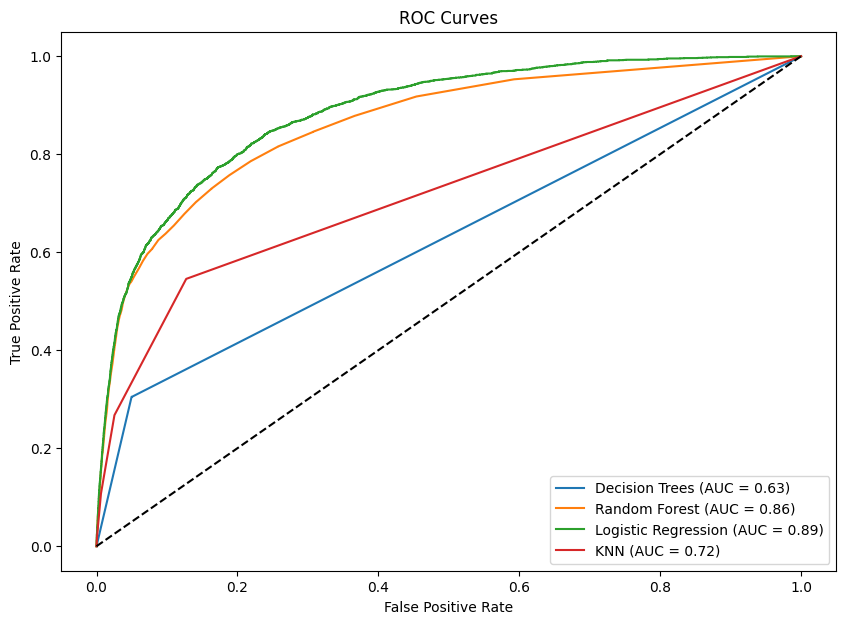

In [22]:
###ROC 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(dt_fpr, dt_tpr, label=f"Decision Trees (AUC = {dt_auc:.2f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})")
#plt.plot(svm_fpr, svm_tpr, label=f"SVM (AUC = {svm_auc:.2f})")
plt.plot(knn_fpr, knn_tpr, label=f"KNN (AUC = {knn_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

In [23]:
##summary of AUC
# Summary of AUC values for each model
auc_values = {
    "Decision Tree": dt_auc,
    "Random Forest": rf_auc,
    "Logistic Regression": lr_auc,
    #"SVM": svm_auc,
    "KNN": knn_auc
}

# Displaying the summary
print("Model AUC Summary:")
print("-------------------")
for model, auc_value in auc_values.items():
    print(f"{model}: {auc_value:.4f}")


Model AUC Summary:
-------------------
Decision Tree: 0.6274
Random Forest: 0.8630
Logistic Regression: 0.8852
KNN: 0.7197


#### Assessment of some of the models and their feature importance graph

In [ ]:
import matplotlib.pyplot as plt
def plot_importance(model, traindf):
    feat_imp = pd.Series(model.feature_importances_, index=traindf.columns)
    feat_imp.nlargest(15).plot(kind='barh', xlabel="feature importance").invert_yaxis()

[0.91972524 0.91346584 0.92447768 0.91874644 0.92557516 0.92183562
 0.92175433 0.89704089 0.92187627 0.92183562] 0.918633309523314


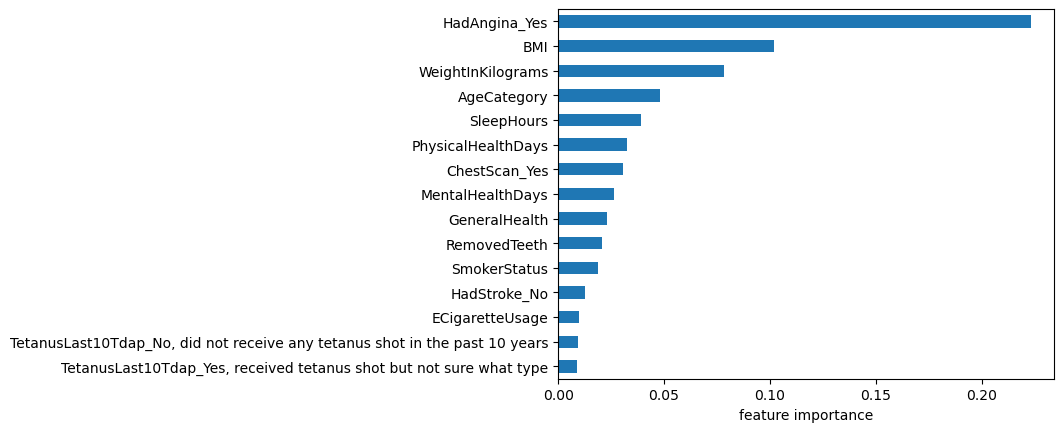

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dc = DecisionTreeClassifier(criterion='entropy')
dc.fit(selected_data, Y)
plot_importance(dc, selected_data)
dc_cv = cross_val_score(dc, selected_data, Y, cv=10)
print(dc_cv, dc_cv.mean())

[0.9486648  0.94663252 0.94898789 0.94687424 0.948744   0.94943501
 0.94976018 0.94569547 0.94784977 0.94732136] 0.9479965234642652


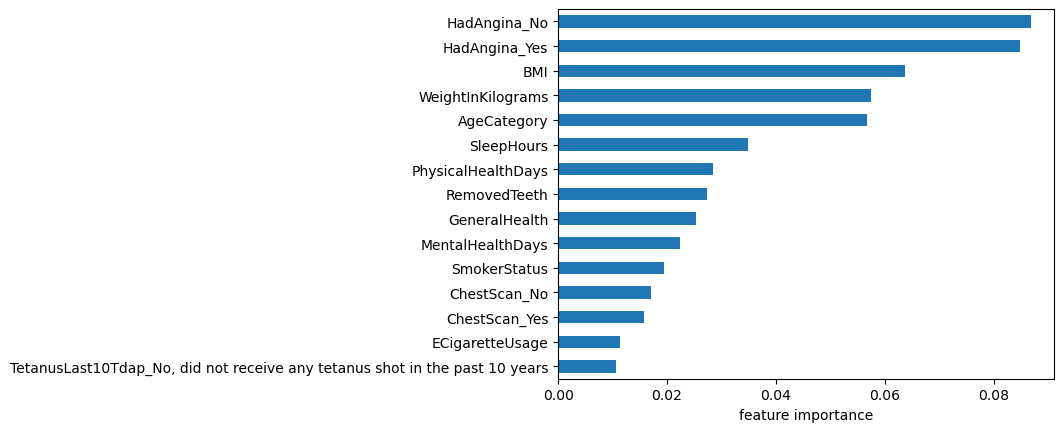

In [141]:
from sklearn.ensemble import RandomForestClassifier
svc = RandomForestClassifier(criterion='entropy', n_estimators=100, n_jobs=8)
svc.fit(selected_data, Y)
plot_importance(svc, selected_data)
svc_cv = cross_val_score(svc, selected_data, Y, cv=10)
print(svc_cv, svc_cv.mean())

[0.94846157 0.94695769 0.94793106 0.94658971 0.94955695 0.94695553
 0.94825624 0.93728152 0.94508577 0.94687424] 0.9463950271552808


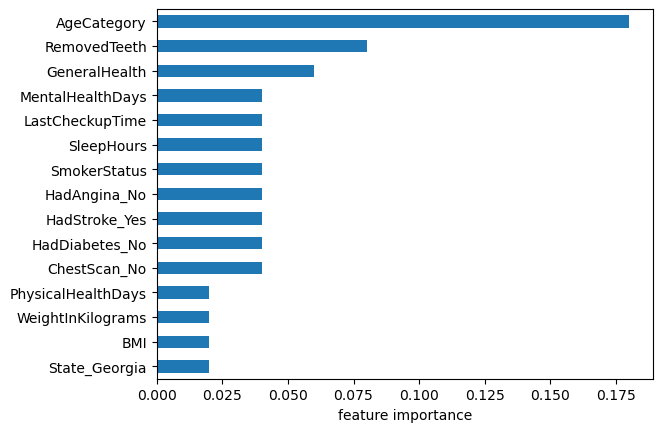

In [142]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(selected_data, Y)
plot_importance(ada, selected_data)
ada_cv = cross_val_score(ada, selected_data, Y, cv=10)
print(ada_cv, ada_cv.mean())

[0.95029061 0.94744543 0.94959759 0.94671165 0.94971953 0.94996342
 0.95000406 0.93626534 0.94756524 0.94862206] 0.9476184955042337


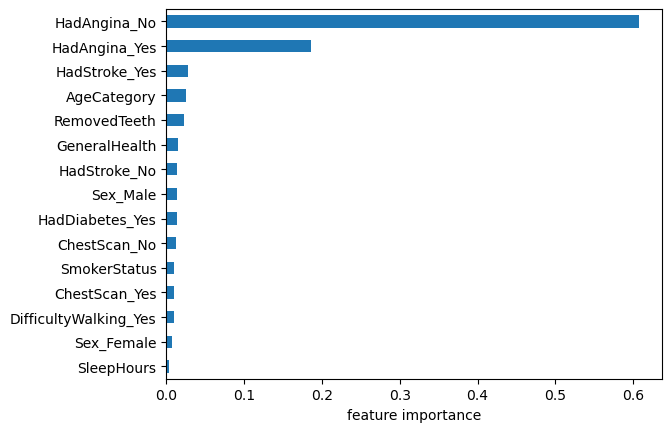

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(selected_data, Y)
plot_importance(gb, selected_data)
gb_cv = cross_val_score(gb, selected_data, Y, cv=10)
print(gb_cv, gb_cv.mean())